<p style="color:#FFF; background:#06D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Version 2025-06</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC–BY–NC–ND</span>
<span style="font-size:40px; font-style:normal"><b>PACKAGE : SEABORN</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick ಄ u<b>-</b>bordeaux • fr</p>

Le package [**seaborn**](https://seaborn.pydata.org) est une sur-couche de **matplotlib** qui fournit à Python des outils spécialisés pour créer des visualisations scientifiques spécifiquement adaptées au domaine des Sciences des Données. Comme on l'a vu dans le chapitre 6, le point fort de **matplotlib** réside dans sa collaboration avec le package **numpy** qui va permettre une visualisation performante pour les données continues 1D ou 2D, ou pour les matrices 2D homogènes. Par contre, visualiser des données hétérogènes, comme celles que l'on stocke dans des tables **pandas**, nécessite de nombreuses manipulations manuelles lorsqu'on utilise les fonctions de visualisation natives de **matplotlib**. A l'inverse, la bibliothèque **seaborn** a été directement conçue pour utiliser les structures de ***séries*** et de ***tables*** fournies par **pandas**, ce qui en fait un outil de visualisation bien mieux adapté que **matplotlib** dans le domaine des Sciences des Données, où les données hétérogènes sont omniprésentes.

Comme pour les autres chapitres, ce notebook a pour objet de faire un tour d'horizon rapide et de montrer les fonctionnalités les plus intéressanes de **seaborn** pour une utilisation dans le domaine des Sciences des Données. La documentation complète du package se trouve sur le site officiel [**seaborn.pydata.org**](https://seaborn.pydata.org/tutorial.html), mais comme pour **matplotlib**, une fois que l'on a maîtrisé les concepts de base du package, le plus efficace est de se reporter à la [**galerie des exemples**](https://seaborn.pydata.org/examples/index.html) sur le site de **seaborn**, pour piocher le code associé au type de visualisation que l'on souhaite mettre en oeuvre.

In [1]:
import warnings; warnings.filterwarnings('ignore') # suppression des 'warning' de l'interpréteur
from SRC.tools import show, inspect # import des fonctions utilitaires du module 'tools'
import numpy as np, pandas as pd, matplotlib.pyplot as mp # les 3 packages indispensables avec 'seaborn'

---
Comme pour **matplotlib**, il existe deux alias courts qui sont habituellement utilisés pour importer le package **seaborn** :

> **`import seaborn as sb`** &emsp;ou&emsp; **`import seaborn as sns`**

> **Note :** L'utilisation de l'alias **`sns`** est un référence à [**Samuel Norman Seaborn**](https://en.wikipedia.org/wiki/Sam_Seaborn) personnage principal de la série télé [**The West Wing**](https://en.wikipedia.org/wiki/The_West_Wing) diffusée sur NBC au début des années 2000. Comme la référence date un peu, cet alias est peu à peu abandonné au profit de l'alias **sb**, plus conforme aux pratiques habituelles des alias courts

In [1]:
import seaborn as sb # import du package 'seaborn' avec l'alias habituel 'sb'

Comme d'habitude, la fonction **`inspect`** permet d'avoir un aperçu général du contenu du package, qui contient environ 60 fonctions et une quinzaine de sous-modules. Il y a principalement deux catégories de fonctions : celles avec le suffixe **`plot`** correspondent aux différents modes de visualisation possibles, celles avec le suffixe **`palette`** permettent de créer différents types de palettes de couleurs pour la visualisation.

In [2]:
inspect(sb, detail=0) # augmenter la valeur de 'detail' pour avoir plus d'informations

● NAME = seaborn / TYPE = module
● ROLE = <empty docstring>

● MODULES : use 'inspect(seaborn.xxx)' to get additional info for each inner module
algorithms     axisgrid       categorical    cm             colors         distributions  
external       matrix         miscplot       mpl            palettes       rcmod          
regression     relational     utils          widgets        

● TYPES : use 'inspect(seaborn.xxx)' to get additional info for each inner type
FacetGrid  JointGrid  PairGrid   

● CONSTANTS
crayons   xkcd_rgb  

● FUNCTIONS
axes_style                  barplot                     blend_palette               
boxenplot                   boxplot                     catplot                     
choose_colorbrewer_palette  choose_cubehelix_palette    choose_dark_palette         
choose_diverging_palette    choose_light_palette        clustermap                  
color_palette               countplot                   crayon_palette              
cubehelix_palette        

---
Le package **seaborn** permet une plus grande flexibilité que **matplotlib** pour contrôler l'aspect esthétique des visualisations. On va ainsi créer un **thème** visuel, composé d'un ***style*** (= choix de la décoration des graphiques), d'une **palette** (= choix des couleurs utilisées) et d'un **contexte** (= choix du mode d'affichage) :

In [3]:
sb.set_theme(style='whitegrid', palette='bright', context='notebook') # configuration du thème visuel
# styles usuels : darkgrid (= défaut) / whitegrid / dark / white / ticks
# palettes usuelles : deep (= défaut) / muted / bright / dark / pastel / flare / hsv / icefire
# contextes usuels : paper / notebook / talk / poster

<h2 style='padding:16px; color:#FFF; background:#06D'>A - Jeux de données pour les tests</h2>

Une des particularités du package **`seaborn`** est qu'il inclut un ensemble de jeux de données (*dataset*) qui sont classiquement utilisés comme bases de test pour divers algorithmes de traitement et de visualisation dans le domaine des Sciences des Données. La liste complète des jeux de données disponibles se trouve sur la [**page github**](https://github.com/mwaskom/seaborn-data) associée au projet **seaborn**, mais les six datasets suivants sont de loin les plus populaires pour l'intégration dans les batteries de tests :

### 1 - Dataset 'flights' (144 lignes)
Le dataset `flights` contient des informations sur le nombre de passagers pour une compagnie aérienne, ventilé par mois et par année. Ce jeu de données est principalement destiné à tester des visualisations temporelles :

- `year` : année (entre 1949 et 1960)
- `month` : mois de l'année (abréviation sur 3 lettres)
- `passengers` : nombre de passagers transportés au cours de ce mois

### 2 - Dataset 'iris' (150 lignes)
Le dataset `iris` contient des mesures de longueur et largeur des sépales et des pétales pour différentes espèces de fleurs d'iris. Ce jeu de données est souvent utilisé en apprentissage automatique pour la classification :

- `species` : nom de l'espèce ***(setosa, versicolor, virginica)***
- `sepal_length` : longueur du sépale (en centimètres)
- `sepal_width` : largeur du sépale (en centimètres)
- `petal_length` : longueur du pétale (en centimètres)
- `petal_width` : largeur du pétale (en centimètres)

### 3 - Dataset 'tips' (244 lignes)
Le dataset `tips` contient des informations sur les factures de restaurant, telles que le montant de la facture, le montant du pourboire, et diverses informations sur le client. Il inclut à la fois des données numériques et des données catégorielles :

- `total_bill` : montant de la facture (hors pourboire)
- `tip` : montant du pourboire
- `day` : jour de la semaine (abréviation sur 3 lettres)
- `time` : heure de service ***(Lunch, Dinner)***
- `size` : nombre de personnes à table
- `sex` : sexe du client ***(Male, Female)***
- `smoker` : salle fumeur ***(Yes, No)***

### 4 - Dataset 'penguins' (344 lignes)
Le dataset `penguins` contient des informations sur différentes espèces de manchots, notamment des mesures physiques telles que le poids ou les longueurs du bec et des nageoires, ainsi que des critères catégoriels pour la classification :

- `species` : nom de l'espèce ***(Adelie, Chinstrap, Gentoo)***
- `island` : île de résidence ***(Biscoe, Dream, Torgersen)***
- `sex` : sexe ***(Male, Female)***
- `body_mass_g` : masse corporelle (en grammes)
- `bill_length_mm` : longueur du bec (en millimètres)
- `bill_depth_mm` : profondeur du bec (en millimètres)
- `flipper_length_mm` : longueur de la nageoire (en millimètres)

### 5 - Dataset 'titanic' (891 lignes)
Le dataset `titanic` contient des informations sur les passagers du Titanic, telles que leur âge, leur sexe, leur classe de cabine, leur port d'embarquement :

- `survived` : indique si le passager a survécu au naufrage (***0*** = non, ***1*** = oui)
- `sex` : sexe du passager ***(Male, Female)***
- `age` : âge du passager (en années)
- `who` : identité ***(man, woman, child)***
- `alone` : indique si le passager était seul
- `sibsp` : nombre de frères, soeurs et conjoints à bord
- `parch` : nombre de parents et enfants à bord
- `fare` : prix du billet
- `class` : classe de cabine ***(First, Second, Third)***
- `deck` : numéro de pont pour la cabine
- `embarked` : port d'embarquement (***C*** = Cherbourg, ***Q*** = Queenstown, ***S*** = Southampton)

### 6 - Dataset 'taxis' (10000 lignes)
Le dataset `taxis` contient des informations très complètes sur une série de courses en taxis à New York, notamment les lieux, dates et heures de départ et d'arrivée, la distance, le nombre de passagers, le coût de la course :

- `pickup` : date et heure de départ
- `dropoff` : date et heure d'arrivée
- `passengers` : nombre de passagers transportés pendant le trajet
- `distance` : distance parcourue pendant le trajet, mesurée en miles
- `total` : total payé pour la course (avec péage et pourboire)
- `fare` : coût de la course en dollars (sans péage ni pourboire)
- `tip` : montant du pourboire donné en dollars
- `tolls` : montant des péages payés en dollars
- `color` : couleur du taxi (= compagnie de taxis)
- `payment` : mode de paiement ***(cash, credit card)***
- `pickup_zone` : zone de départ (nom du quartier)
- `dropoff_zone` : zone d'arrivée (nom du quatier)

---
Pour les exemples de visualisation présentés dans ce notebook, nous allons uniquement récupérer les deux datasets **flights** et **penguins**, ce qui s'effectue très simplement avec la fonction **`sb.load_dataset`** :

In [4]:
flights = sb.load_dataset('flights')
penguins = sb.load_dataset('penguins')
# les noms des colonnes de 'penguins' sont un peu longs, donc on renomme avec des noms plus courts
penguins.columns = 'species island beak_l beak_d flipper weight sex'.split()

<h2 style='padding:16px; color:#FFF; background:#06D'>B - Modes de visualisation</h2>

Le package **`seaborn`** contient plus de 25 modes de visualisation, avec pour chacun une fonction dédiée sous la forme **`sb.xxxplot(data, args...)`**. On présente ici les fonctions les plus courantes, mais comme indiqué plus haut, en se reportant à la [**galerie des exemples**](https://seaborn.pydata.org/examples/index.html) sur le site de **seaborn**, on pourra trouver des exemples pour l'intégralité des modes de visualisation disponibles.

---
### 1 - Visualisation par segments de droites : **`lineplot`**

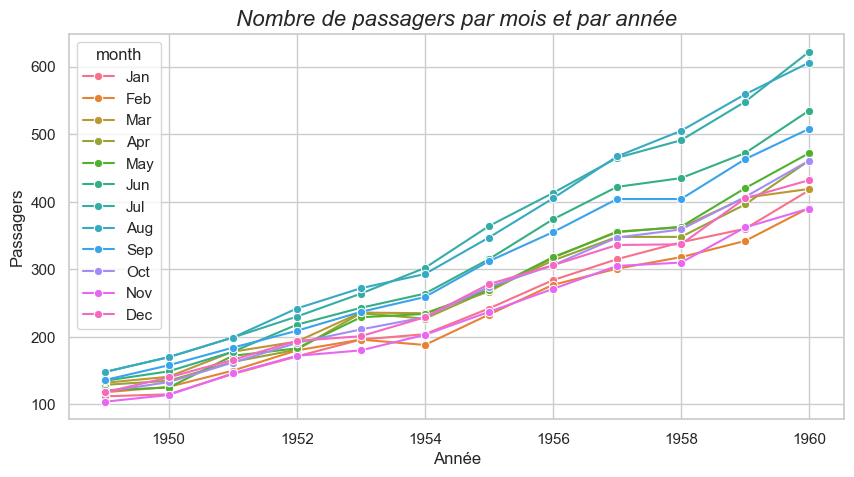

In [5]:
mp.figure(figsize=(10,5)) # les figures 'seaborn' sont en fait des figures 'matplotlib'
sb.lineplot(flights, x='year', y='passengers', hue='month', marker='o') # segments de droite + marqueurs
mp.title('Nombre de passagers par mois et par année', fontsize=16, style='italic')
mp.xlabel('Année'); mp.ylabel('Passagers'); # toujours mettre le titre et les labels en dernier

---
### 2 - Visualisation par carte thermique : **`heatmap`**

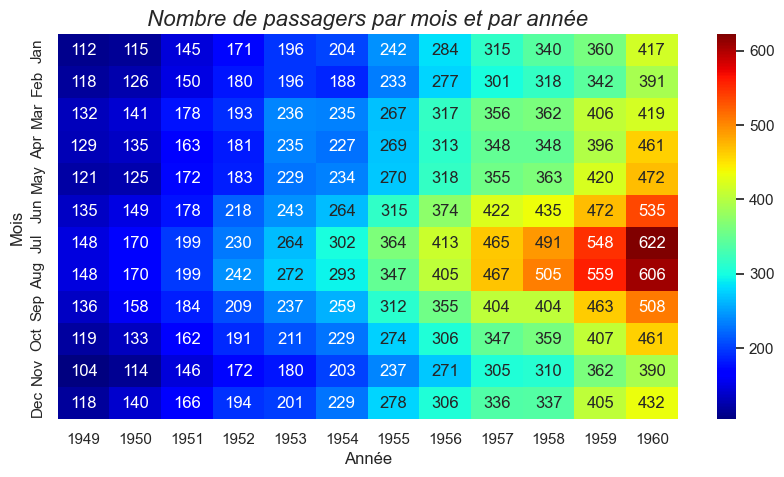

In [6]:
mp.figure(figsize=(10,5))
pivot = flights.pivot(index='month', columns='year', values='passengers') # création de la table pivot
sb.heatmap(pivot, fmt='3d', cmap='jet', annot=True) # carte de température
mp.title('Nombre de passagers par mois et par année', fontsize=16, style='italic')
mp.xlabel('Année'); mp.ylabel('Mois');

---
### 3 - Visualisation par boîtes à moustaches : **`boxplot`**

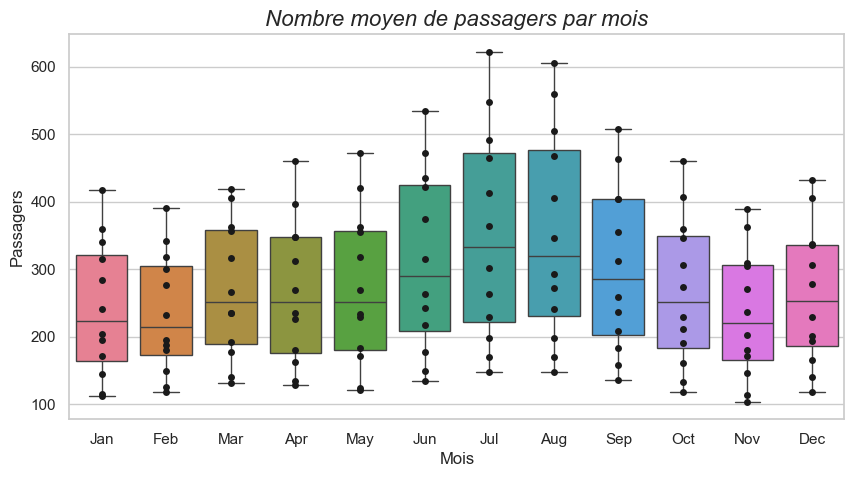

In [7]:
mp.figure(figsize=(10,5))
sb.boxplot(pivot.T); # boîte à moustache (sur la transposée de la table pivot précédente)
sb.stripplot(pivot.T, color='k', jitter=False); # et les échantillons en surimpression
mp.title('Nombre moyen de passagers par mois', fontsize=16, style='italic')
mp.xlabel('Mois'); mp.ylabel('Passagers');

---
### 4 - Visualisation par estimateur de densité : **`kdeplot`**

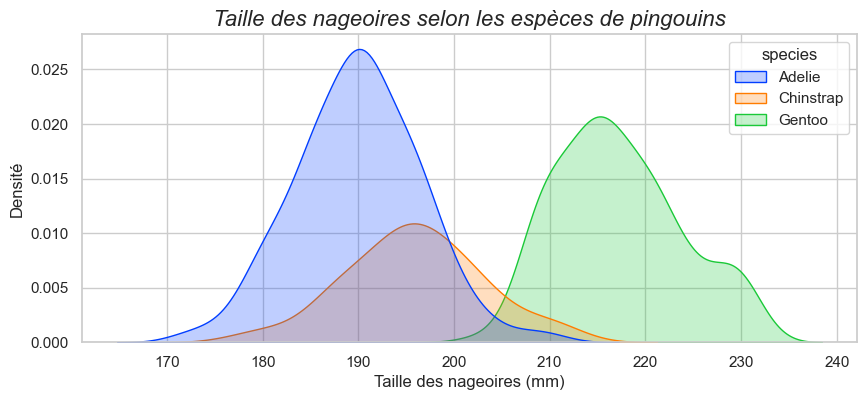

In [8]:
mp.figure(figsize=(10,4))
sb.kdeplot(penguins, x='flipper', hue='species', fill=True) # estimateur de densité
mp.title('Taille des nageoires selon les espèces de pingouins', fontsize=16, style='italic')
mp.xlabel('Taille des nageoires (mm)'); mp.ylabel('Densité');

---
### 5 - Visualisation par histogramme : **`histplot`**

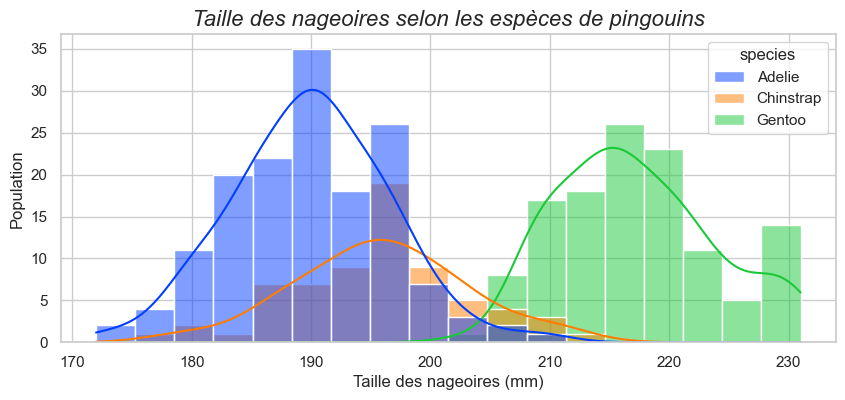

In [9]:
mp.figure(figsize=(10,4))
sb.histplot(penguins, x='flipper', hue='species', bins=18, kde=True) # histogramme + estimateur de densité
mp.title('Taille des nageoires selon les espèces de pingouins', fontsize=16, style='italic')
mp.xlabel('Taille des nageoires (mm)'); mp.ylabel('Population');

---
### 6 - Visualisation par nuage de points : **`scatterplot`**

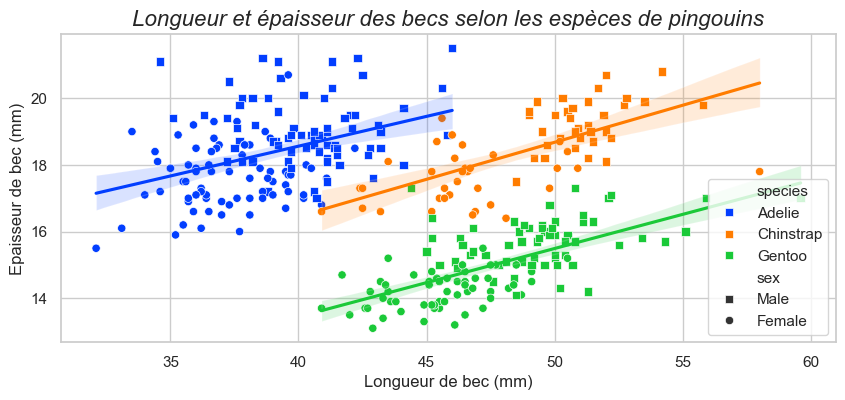

In [10]:
mp.figure(figsize=(10,4)); markers = dict(Male='s', Female='o') # on différencie les marqueurs mâle/femelle
sb.scatterplot(penguins, x='beak_l', y='beak_d', hue='species', markers=markers, style='sex')
for species, group in penguins.groupby('species'): # on itère sur les espèces
  sb.regplot(data=group, x='beak_l', y='beak_d', scatter=None) # et on rajoute une régression linéaire
mp.title('Longueur et épaisseur des becs selon les espèces de pingouins', fontsize=16, style='italic')
mp.xlabel('Longueur de bec (mm)'); mp.ylabel('Epaisseur de bec (mm)');

---
### 7 - Visualisation par couples de paramètres : **`pairplot`**

Lorsqu'on cherche à identifier des corrélations entre certains paramètres des données, la fonction **`pairplot`** est idéale, car elle va afficher les nuages de points pour chaque couple de paramètres numériques présents dans la table étudiée :

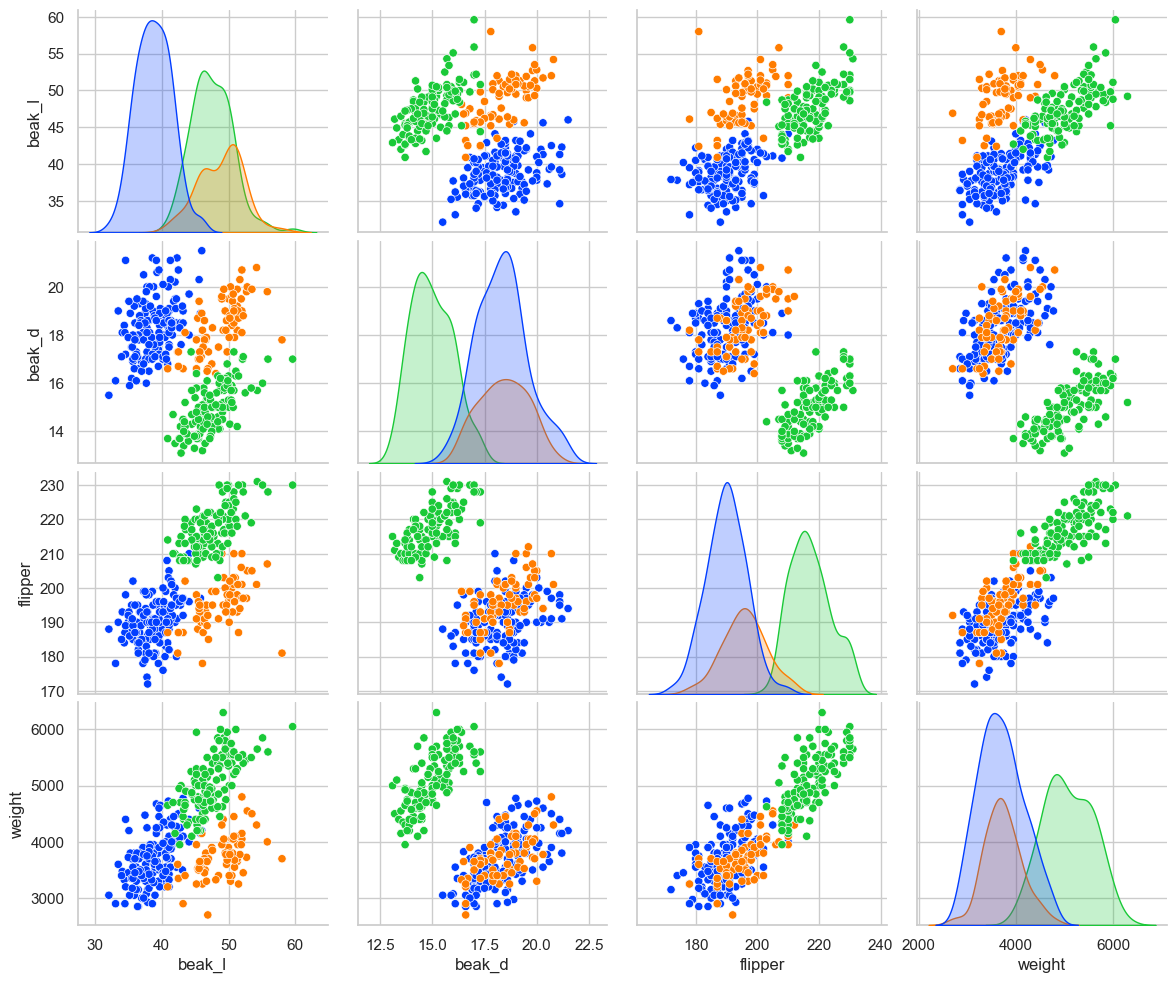

In [11]:
# pour gagner de la place en largeur, on supprime la légende automatique fournie par hue='species'
pp = sb.pairplot(penguins, hue='species', aspect=1.2); pp._legend.remove()

---
### 8 - Visualisation par diagrammes en violon : **`violinplot`**

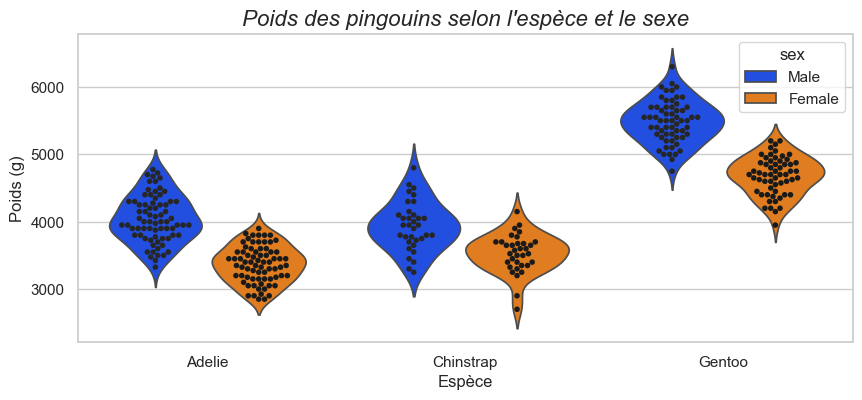

In [12]:
# version 1 : diagrammes en violon + surimpression des différents échantillons pour voir la répartition
mp.figure(figsize=(10,4))
sb.violinplot(penguins, x='species', y='weight', hue='sex', inner=None) # diagramme en violon
sb.swarmplot(penguins, x='species', y='weight', hue='sex', color='k', dodge=True, size=4, legend=False);
mp.title("Poids des pingouins selon l'espèce et le sexe", fontsize=16, style='italic')
mp.xlabel('Espèce'); mp.ylabel('Poids (g)');

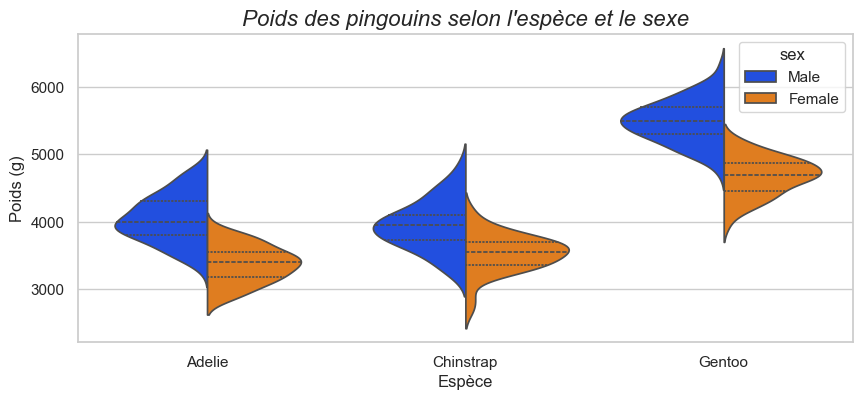

In [13]:
# version 2 : diagramme en split-violon (on sépare selon le sexe) et surimpression des 3 quartiles
mp.figure(figsize=(10,4))
sb.violinplot(penguins, x='species', y='weight', hue='sex', inner='quart', split=True) # split-violon
mp.title("Poids des pingouins selon l'espèce et le sexe", fontsize=16, style='italic')
mp.xlabel('Espèce'); mp.ylabel('Poids (g)');

<div style="padding:8px; margin:0px -20px; color:#FFF; background:#06D; text-align:right">● ● ● </div>